## Za konec narišimo sliko

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os.path

from helpers import *

## Osnovne nastavitve

In [2]:
require_biomass = True
folder_enrich = os.path.join('enrichment','biomass') if require_biomass else os.path.join('enrichment','no_biomass')

## Podatki

In [3]:
df = pd.read_csv(os.path.join(f'{folder_enrich}','subsystems.csv'))

### Up/Down

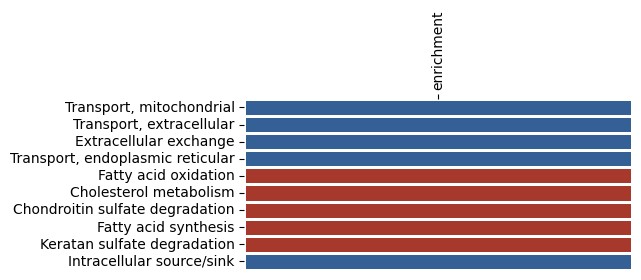

In [4]:
df_to_plot = df[['subsystem', 'enrichment']]
df_to_plot = df_to_plot[df_to_plot.enrichment != 0]
df_to_plot = df_to_plot.set_index("subsystem")
make_plot(df_to_plot, folder_enrich, "up_down_selected")

## Changed

In [ ]:
#df_to_plot = df[['subsystem', 'changed']]
#df_to_plot = df_to_plot.set_index("subsystem")
#make_plot(df_to_plot, folder_enrich, "changed")